# Bin profiles

## Import packages

## Import notebook functions

In [1]:
fetch_data_notebook = 'lmm_fetch_data.ipynb'

%run {fetch_data_notebook}

plot_data_notebook = 'lmm_plot_data.ipynb'

%run {plot_data_notebook}

data_binner_notebook = 'lmm_data_binner.ipynb'

%run {data_binner_notebook}

## Retrieve data from Argovis

### Retrieve data as a dataframe

In [2]:
# start_date = '2022-04-19'
# end_date = '2022-05-03'
# pressure_range ='[0,2000]'
# shape = [[[-126.934838,15.938736],[-126.934838,12.139454],[-123.017771,12.283923],[-123.165585,15.583095],[-126.934838,15.938736]]]

# fetch_obj = ArgovisDataImporter(start_date, end_date, pressure_range, shape=shape)

# df = fetch_obj.get_cleaned_profile()
# df.head()

In [3]:
start_date = '2020-4-10'
end_date = '2020-4-29'
pressure_range = '[0,500]'
region = 'atlantic_coords'
argo_source = 'argo_core'
fetch_obj = ArgovisDataImporter(start_date, end_date, pressure_range, source=argo_source, region=region)

df = fetch_obj.get_cleaned_profile()
df.head()

len(df)

https://argovis.colorado.edu/selection/profiles?startDate=2020-4-10&endDate=2020-4-29&source=argo_core&shape=[[[-40.078125,29.840644],[-33.368671,30.338837],[-26.614528,30.492027],[-19.863281,30.297018],[-20.039063,-30.145127],[-26.724822,-30.384017],[-33.419918,-30.281826],[-40.078125,-29.840644],[-40.078125,29.840644]]]&presRange=[0,500]


76666

### Create data binner

In [4]:
data_binner_obj = DataBinner(df)

### Create list of dataframes grouped on profile_id

What if bin each df by pressure first, and then combine into xarray?

In [5]:
df_grouped = data_binner_obj.get_df_grouped_by_id()

len(df_grouped)

411

In [6]:
df_grouped

,pres,temp,cycle_number,lat,lon,psal,pres_qc,psal_qc,temp_qc,year,month,day,datetime
date,,,,,,,,,,,,,
2020-04-10T02:36:42.000Z,"[498.01, 180.01, 178.01, 176.01, 174.01, 172.0...","[7.22, 18.101, 18.221, 18.363, 18.455, 18.567,...","[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80....","[-15.054, -15.054, -15.054, -15.054, -15.054, ...","[-25.814, -25.814, -25.814, -25.814, -25.814, ...","[34.589, 35.959, 35.983, 36.006, 36.022, 36.04...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2020-04-10 02:36:42+00:00, 2020-04-10 02:36:4..."
2020-04-10T03:05:49.000Z,"[154.08, 162.04, 156.04, 158.0, 160.08, 164.0,...","[20.179, 19.58, 20.043, 19.841, 19.622, 19.551...","[381.0, 381.0, 381.0, 381.0, 381.0, 381.0, 381...","[19.95187, 19.95187, 19.95187, 19.95187, 19.95...","[-31.72198, -31.72198, -31.72198, -31.72198, -...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2020-04-10 03:05:49+00:00, 2020-04-10 03:05:4..."
2020-04-10T04:00:00.000Z,"[96, 25, 85, 76, 65, 55, 46, 15, 4, 9, 8, 7, 6...","[23.733, 28.326, 24.181, 24.666, 25.529, 27.75...","[90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90....","[-19.477, -19.477, -19.477, -19.477, -19.477, ...","[-28.480000000000018, -28.480000000000018, -28...","[36.952, 37.482, 36.984, 36.994, 37.04, 37.39,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2020-04-10 04:00:00+00:00, 2020-04-10 04:00:0..."
2020-04-10T05:17:00.000Z,"[116, 105, 95, 85, 76, 66, 56, 10, 35, 25, 16,...","[20.013, 20.855, 21.268, 21.158, 21.065, 21.60...","[69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69....","[20.117, 20.117, 20.117, 20.117, 20.117, 20.11...","[-25.747000000000014, -25.747000000000014, -25...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2020-04-10 05:17:00+00:00, 2020-04-10 05:17:0..."
2020-04-10T05:38:30.000Z,"[158.1, 156.9, 155.9, 154.8, 151.9, 153.0, 150...","[20.685, 20.971, 21.205, 21.273, 21.338, 21.33...","[112.0, 112.0, 112.0, 112.0, 112.0, 112.0, 112...","[26.468788333333332, 26.468788333333332, 26.46...","[-31.12566, -31.12566, -31.12566, -31.12566, -...","[37.149, 37.18, 37.232, 37.254, 37.268, 37.266...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[2020, 2020, 2020, 2020, 2020, 2020, 2020, 202...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2020-04-10 05:38:30+00:00, 2020-04-10 05:38:3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28T17:59:30.000Z,"[127.7, 101.5, 103.3, 105.6, 107.6, 109.4, 111...","[13.832, 15.389, 15.215, 14.909, 14.819, 14.77...","[94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94.0, 94....","[5.836411666666667, 5.836411666666667, 5.83641...","[-24.70615, -24.70615, -24.70615, -24.70615, -...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."

### For each df, turn into an xarray, then bin the pressure, and after finish list, recombine on pressure

<xarray.DataArray 'temp_mean' (day_bins: 29)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 17.15093763, 16.49323829,
       15.20840303,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan])
Coordinates:
  * day_bins  (day_bins) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5


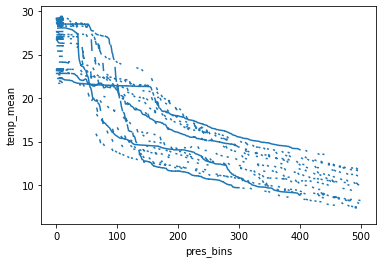

In [57]:
bin_size = 1

num_groups = len(df_grouped)

df_grouped.iloc[0]

count = 0

ds_list = []

for group in range(0,num_groups):
    
    if count == 50:
        break
    
    df_group = df_grouped.iloc[group]
    
    df = df_group.to_frame()
    
    data_binner_obj = DataBinner(df)
    
    data_binner_obj.create_dataframe(df)
    
    group_date = df.columns[0][0]
    
    # TODO
    # Fix this function so it applies qc rather than just dropping the qc cols
    data_binner_obj.apply_qc()
        
    try:
        ds = data_binner_obj.create_xarray()
        
    except ValueError:
        # skip any that don't have the same variable names
        pass
         
    # TODO
    # Inside bin_on_pressure, the range is set. Move outside of function
    psal_mean = data_binner_obj.bin_on_pressure('psal', bin_size)
    temp_mean = data_binner_obj.bin_on_pressure('temp', bin_size)
    
    ds_shape = psal_mean.shape
    
    pressure = psal_mean.coords['pres_bins'].values
            
    # Now put this back in an xarray and later, recombine
    
    # All the coordinates are the same at each row except for pressure
    # Add back in the date value which was the starting column number
    
    new_ds = xr.Dataset(
    {
        "psal_mean": (("pres_bins"), psal_mean.data),
        "temp_mean": (("pres_bins"), temp_mean.data),
    })
    
    metadata = {}
    
              
    for name in ds.coords:
        
        if name == 'index' or name =='pres':
            continue
            
        val = ds[name][0].values
        
        meta_array = np.full(ds_shape, val)
        
        metadata[name] = meta_array
        
        new_ds = new_ds.assign_coords({name: ("pres_bins", meta_array)})
        
    metadata['date'] = np.full(ds_shape, group_date)
    
    new_ds = new_ds.assign_coords({"date": ("pres_bins", metadata['date'])})
    
    new_ds = new_ds.assign_coords({"pres_bins": ("pres_bins", pressure)})
    
    ds_list.append(new_ds)
    
    count+=1
    
    
ds_all = xr.concat(ds_list, dim ='pres_bins')

# print(ds_all.sizes)

# print(ds_all)

ds_all['temp_mean'].plot()

#xr.plot.scatter(ds_all,'pres_bins', 'temp_mean', size=8)



time_interval = 'month'

if time_interval == 'month':
    time_bins = np.arange(1,13)
    


# define a label for each bin corresponding to the central value
time_center = np.arange(1.5,12.5)


time_bins = np.arange(1,31)
time_center = np.arange(1.5,30.5)

# group according to those bins and take the mean
param = 'temp_mean'

#temp_mean = ds_all[param].groupby_bins('month', time_bins, labels=time_center).mean(dim=xr.ALL_DIMS)


temp = ds_all[param].groupby_bins('day', time_bins, labels=time_center).mean()

print(temp)


pressure = ds_all[param].coords['pres_bins'].values

temperature = temp_mean.values

# print(temp.keys())

# for key in temp.keys():
#     z = temp[key]
#     #plt.plot(pressure, z)
#     print(np.shape(z))
    
# print(np.shape(pressure))

# temp_vals = temp.values()



### Create xarray from dataframe indexed on lat, lon, date, pres

In [ ]:
# ds = data_binner_obj.create_xarray()
# ds

In [ ]:
#xr.plot.scatter(ds,'pres', 'psal', size=8)

## Bin on pressure and take the mean

In [ ]:
# bin_size = 1
# param = 'psal'
# psal_mean = data_binner_obj.bin_on_pressure(param, bin_size)

# psal_mean.plot()

In [ ]:
# param = 'temp'
# temp_mean = data_binner_obj.bin_on_pressure(param, bin_size)
# temp_mean.plot()

In [ ]:
# param = 'temp'
# time_interval = 'month'
# temp_mean = data_binner_obj.bin_on_time(param, time_interval)
# temp_mean.plot()